# `wyextreme`: A Python Package for GEV or GEV-shift fit

* Wenchang Yang
* Department of Geosciences, Princeton University

In [1]:
#plot config
from wyconfig import *


**wython plot settings (//home/wenchang/wython/wyconfig.py)**
plt.rcParams:
    figure.dpi: 128.0
    figure.figsize: [6.4, 3.6]
    figure.constrained_layout.use: True
    axes.spines.right: False
    axes.spines.top: False
    axes.grid: True
    grid.linestyle: --
    grid.alpha: 0.5
    legend.frameon: False
    hatch.color: gray
    hatch.linewidth: 0.5
[registered colormaps]: tc and tc_r
[registered colormaps]: parula and parula_r
[imported]: import misc.colormaps
[config]: xr.set_options(cmap_sequential="parula")
[shortcut functions]:
    constrained_layout_on():  plt.rcParams['figure.constrained_layout.use'] = True
    constrained_layout_off(): plt.rcParams['figure.constrained_layout.use'] = False
[created]: def wysavefig(figname, **kws):
[iPython config]: InlineBackend.figure_format ='retina'



In [2]:
from wyextreme.gev_shift import plot_covariate, plot_fit_bootstrap
from wyextreme.data import TXx_ERA5 as ts, GMST as gmst

wy fit params:   mu0=29.28; sigma=1.702; xi=-0.1337; alpha=2.592
[exists]: wyextreme_covariate.png


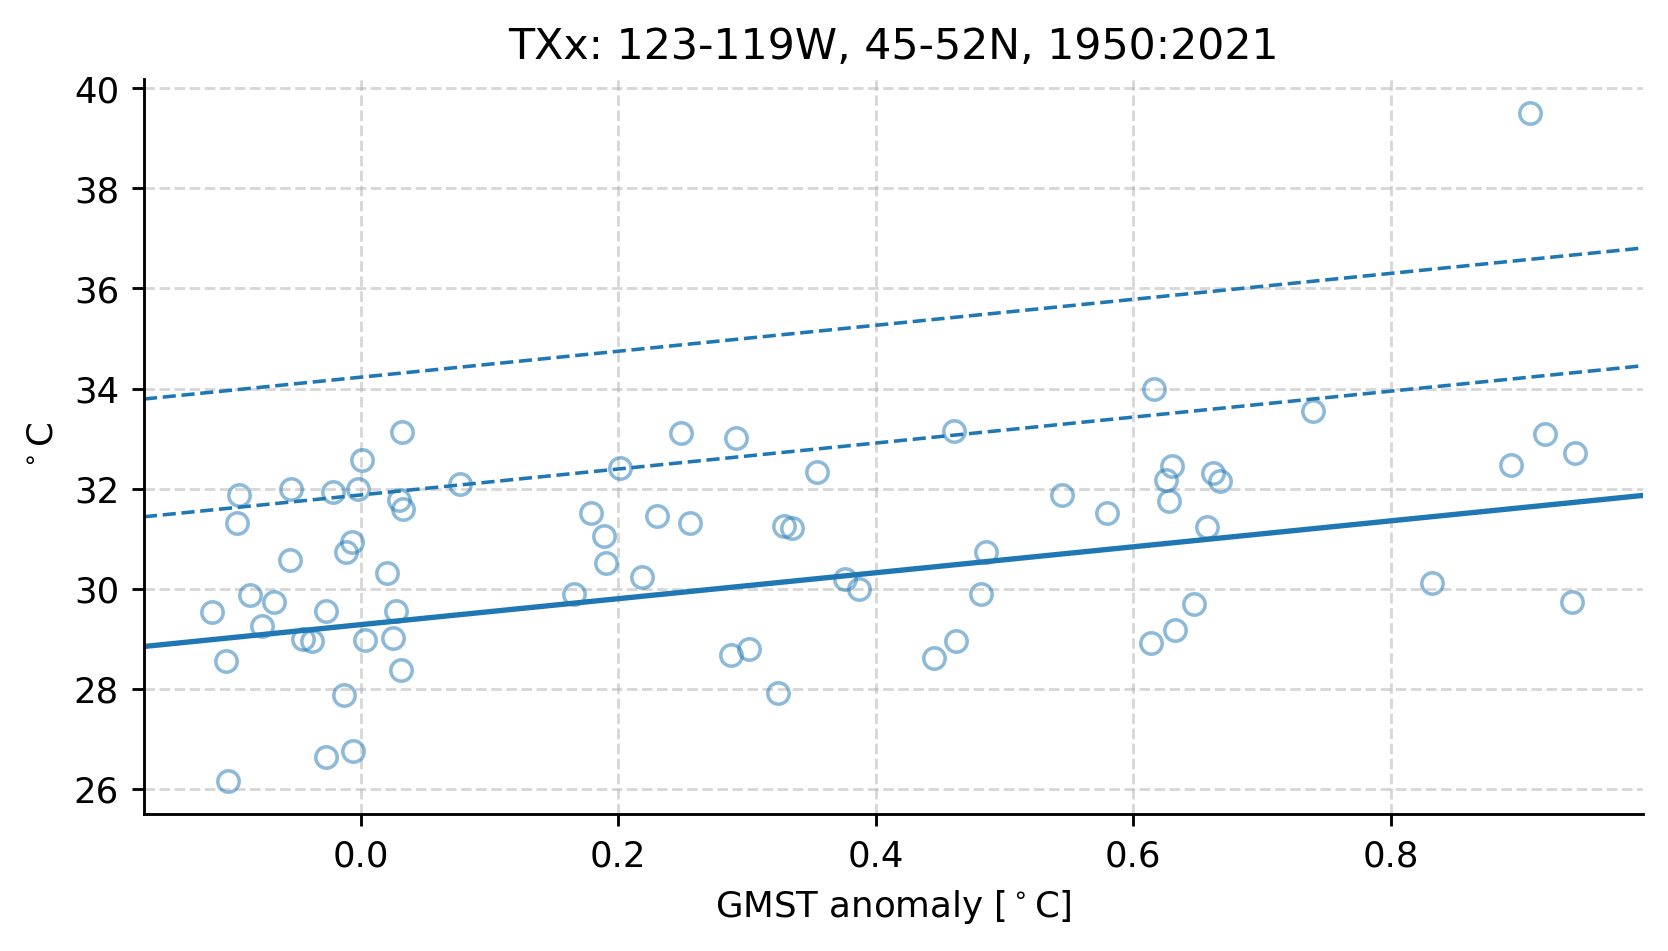

In [6]:
#data vs. co-variate
fig, ax = plt.subplots()
plot_covariate(ts, gmst, ax=ax)
ax.set_title('TXx: 123-119W, 45-52N, 1950:2021')
ax.set_xlabel('GMST anomaly [$^\circ$C]')
ax.set_ylabel('$^\circ$C')

figname = 'wyextreme_covariate.png'
if not os.path.exists(figname):
    plt.savefig(figname)
    print('[saved]:', figname)
else:
    print('[exists]:', figname)

wy fit params:   mu0=29.28; sigma=1.702; xi=-0.1337; alpha=2.592



100%|██████████| 100/100 [00:02<00:00, 46.19it/s]


     mu0 and 95% CI: 29.28(28.8, 30.31)
   sigma and 95% CI: 1.702(1.448, 2.025)
      xi and 95% CI: -0.1337(-0.7012, -0.04094)
   alpha and 95% CI: 2.592(1.105, 4.265)

wy fit params:   mu0=29.28; sigma=1.702; xi=-0.1337; alpha=2.592

     mu0 and 95% CI: 29.28(28.8, 30.31)
   sigma and 95% CI: 1.702(1.448, 2.025)
      xi and 95% CI: -0.1337(-0.7012, -0.04094)
   alpha and 95% CI: 2.592(1.105, 4.265)

[saved]: wyextreme_fit.png


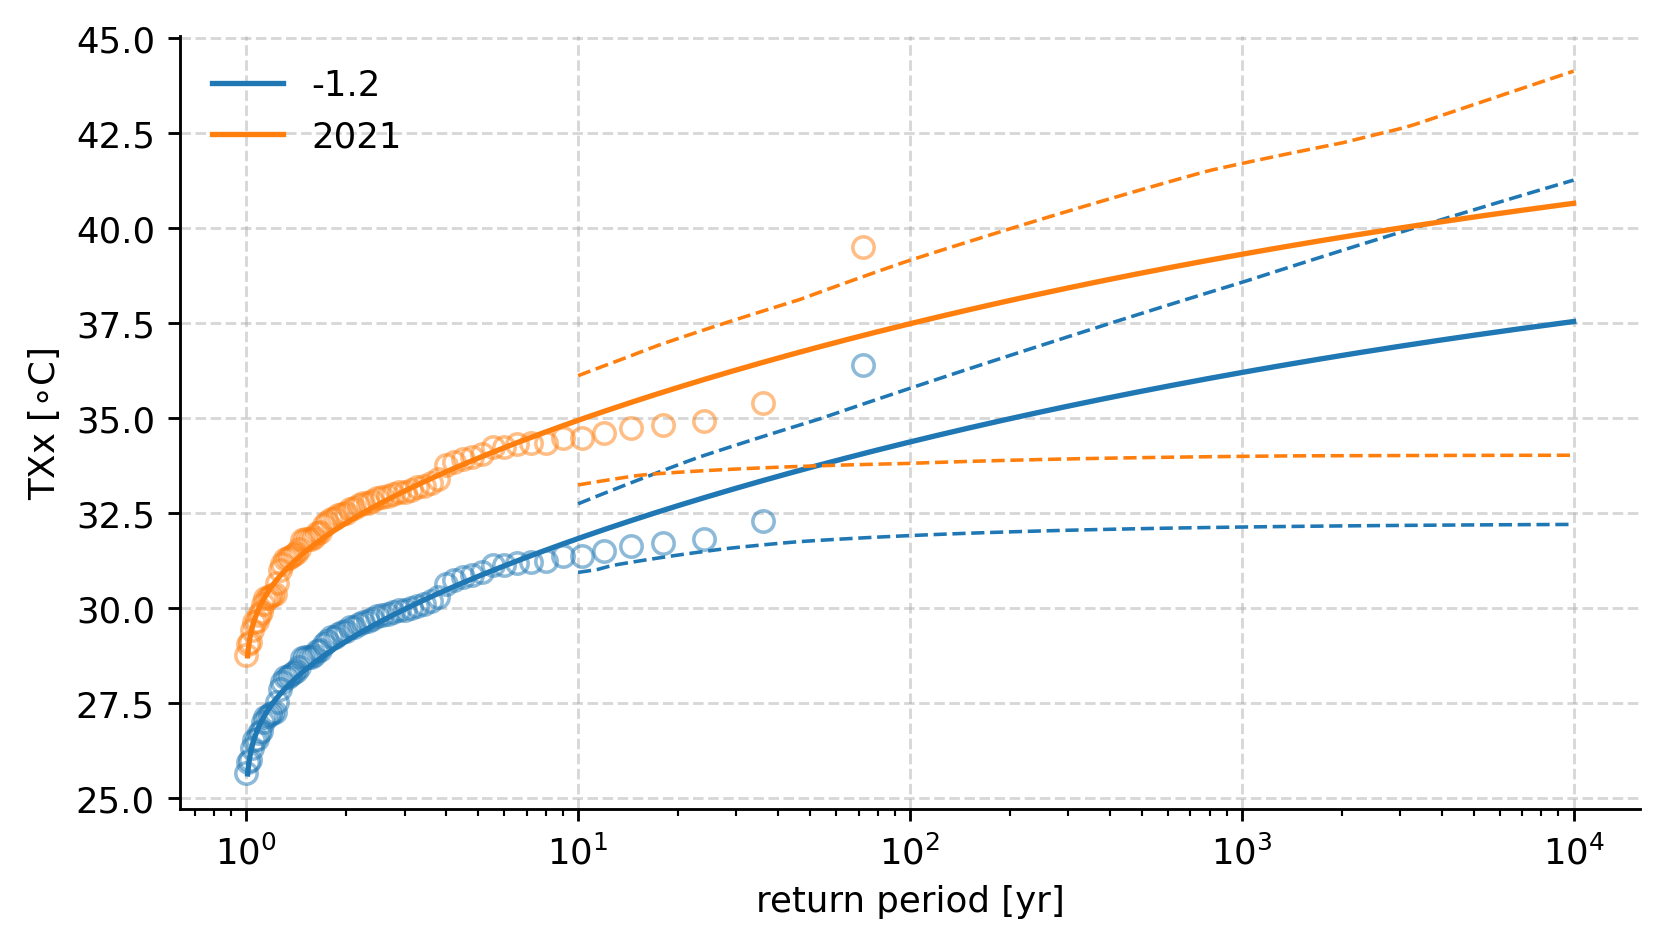

In [7]:
#GEV-shift fit and bootstrap
fig, ax = plt.subplots()
ds = plot_fit_bootstrap(ts, gmst, ('-1.2', gmst[-1].item()-1.2), upper_rp=1e4, ax=ax, color='C0')
ds = plot_fit_bootstrap(ts, gmst, ('2021', gmst[-1].item()), bsfit=ds,  upper_rp=1e4, ax=ax, color='C1')
ax.legend()
ax.set_xlabel('return period [yr]')
ax.set_ylabel('TXx [$\circ$C]')

figname = 'wyextreme_fit.png'
if not os.path.exists(figname):
    plt.savefig(figname)
    print('[saved]:', figname)
else:
    print('[exists]:', figname)